In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('SUNPHARMA.csv')
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     528
%Deliverble            528
dtype: int64

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df = df[df['Date']>"2019-01-01"]

In [5]:
X = df[['Date','Prev Close']].values
y = df['Close'].values

In [6]:
X

array([[Timestamp('2019-01-02 00:00:00'), 433.55],
       [Timestamp('2019-01-03 00:00:00'), 440.05],
       [Timestamp('2019-01-04 00:00:00'), 436.1],
       ...,
       [Timestamp('2021-04-28 00:00:00'), 639.25],
       [Timestamp('2021-04-29 00:00:00'), 643.4],
       [Timestamp('2021-04-30 00:00:00'), 644.5]], dtype=object)

In [7]:
X.shape

(576, 2)

In [8]:
y=y.reshape(-1,1)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)


In [10]:
y_test.shape

(58, 1)

In [11]:
X_df = pd.DataFrame(X_train, columns=[['Date','Prev Close']])
y_df = pd.DataFrame(y_train, columns=['Close'])

In [12]:
X_df

,Date,Prev Close
0,2019-04-04,462.0
1,2020-04-13,454.45
2,2019-01-23,418.95
3,2019-01-18,426.55
4,2020-06-23,493.2
...,...,...
513,2020-02-14,418.95
514,2019-01-15,450.85
515,2020-06-19,484.25
516,2019-10-16,396.8


In [13]:
Xtest_df = pd.DataFrame(X_test, columns=[['Date','Prev Close']])
y_testdf = pd.DataFrame(y_test, columns=['Close'])

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_df[['Prev Close']])
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y_df)

LinearRegression()

In [16]:
Xtest_df['Prev Close']

,Prev Close
0,523.45
1,412.95
2,568.7
3,473.4
4,618.95
5,601.45
6,633.25
7,439.75
8,596.25
9,429.8


In [17]:
X_plot = Xtest_df.iloc[:,0:1]
X_plotdf = pd.DataFrame(X_plot,columns = [('Date',)])

In [18]:
X_plotdf

,Date
0,2020-09-04
1,2019-05-24
2,2020-12-09
3,2020-04-21
4,2021-03-05
5,2021-02-25
6,2021-04-16
7,2019-12-19
8,2021-01-04
9,2019-12-12


In [19]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(Xtest_df['Prev Close']))

In [20]:
r2_score(y_testdf,y_pred)

0.989518244123097

In [21]:
y_pred.shape

(58, 1)

In [22]:
y_preddf = pd.DataFrame(y_pred, columns=['Close'])

In [23]:
y_test

array([[512.45],
       [415.75],
       [569.55],
       [473.15],
       [611.2 ],
       [609.55],
       [646.05],
       [433.6 ],
       [604.4 ],
       [434.15],
       [569.05],
       [624.35],
       [410.2 ],
       [627.5 ],
       [411.15],
       [419.35],
       [631.5 ],
       [482.6 ],
       [443.7 ],
       [521.05],
       [603.45],
       [513.25],
       [605.5 ],
       [464.45],
       [421.95],
       [452.9 ],
       [430.5 ],
       [441.7 ],
       [582.3 ],
       [412.4 ],
       [439.85],
       [482.  ],
       [440.9 ],
       [450.9 ],
       [418.95],
       [426.45],
       [343.55],
       [436.1 ],
       [485.6 ],
       [479.95],
       [433.6 ],
       [513.9 ],
       [543.85],
       [473.1 ],
       [427.8 ],
       [639.95],
       [418.95],
       [433.4 ],
       [412.  ],
       [594.7 ],
       [453.8 ],
       [433.3 ],
       [532.25],
       [623.6 ],
       [575.75],
       [389.95],
       [571.65],
       [408.65]])

In [24]:
y_pred

array([[524.11117799],
       [413.23255181],
       [569.89036703],
       [473.11475138],
       [618.87656353],
       [602.1330579 ],
       [632.24484409],
       [439.38901666],
       [597.08575831],
       [429.58952618],
       [549.32048284],
       [614.3711991 ],
       [412.32026584],
       [626.57951987],
       [416.94106067],
       [427.63162695],
       [628.48980103],
       [475.24208984],
       [433.32074909],
       [523.75418654],
       [604.98249245],
       [512.88421241],
       [613.79993425],
       [477.42209353],
       [417.85889204],
       [447.98086585],
       [429.49153297],
       [440.32949493],
       [570.23999944],
       [410.16411878],
       [439.73541493],
       [479.75630391],
       [431.01157354],
       [458.73978449],
       [399.295321  ],
       [438.99326766],
       [357.71168492],
       [439.68592275],
       [475.74889015],
       [487.58474069],
       [439.6364328 ],
       [513.34368736],
       [526.66047204],
       [465

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.989518244123097

In [26]:
new_df = pd.merge(X_plotdf, y_preddf, left_index=True, right_index=True)

In [27]:
old_df = pd.merge(X_plotdf, y_testdf, left_index=True, right_index=True)

In [28]:
new_df = new_df.rename(columns = {('Date',):'Date'})
old_df = old_df.rename(columns = {('Date',):'Date'})
new_df = new_df.rename(columns={('Close'):'Predicted Price'})
old_df = old_df.rename(columns={('Close'):'Actual Price'})

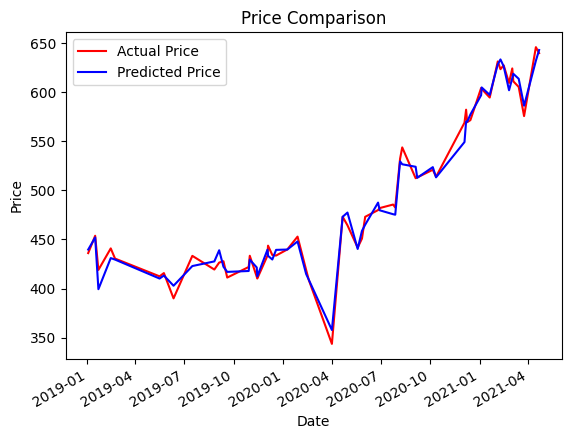

In [29]:
old_df.set_index('Date', inplace=True)
new_df.set_index('Date',inplace=True)
ax = old_df.plot(color='red')
new_df.plot(ax=ax,color='blue')
plt.title('Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()